In [1]:
# 01_feature_engineering.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


In [2]:

# 🚩 Config
RAW_DIR = Path("../data/raw")
PROCESSED_DIR = Path("../data/processed")
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

TICKER = "EWLD.PA"
WINDOW_FWD = 30


In [3]:

# 🚩 Charger les données
df = pd.read_parquet(RAW_DIR / f"{TICKER.replace('.','_')}.parquet")
df = df.reset_index()  # Assurez-vous d'avoir une colonne 'Date' si besoin
df = df.sort_values("Date")


In [4]:

# ✅ Feature Engineering de base
df['daily_return'] = df['Close'].pct_change()
df['weekly_return'] = df['Close'].pct_change(5)
df['monthly_return'] = df['Close'].pct_change(21)
df['rolling_volatility_21'] = df['daily_return'].rolling(21).std()
df['rolling_volatility_63'] = df['daily_return'].rolling(63).std()
df['momentum_21'] = df['Close'] / df['Close'].shift(21) - 1
df['momentum_63'] = df['Close'] / df['Close'].shift(63) - 1
df['ma_21'] = df['Close'].rolling(21).mean()
df['ma_63'] = df['Close'].rolling(63).mean()
df['drawdown'] = (df['Close'] / df['Close'].cummax()) - 1


In [5]:

# ✅ Target : 30-day forward return
df['target'] = df['Close'].pct_change(WINDOW_FWD).shift(-WINDOW_FWD)


In [6]:

# ✅ Nettoyage des NaN
df_clean = df.dropna().copy()


In [7]:

# ✅ Analyse rapide
print(df_clean.describe())


Price                            Date       Close        High         Low  \
Ticker                                    EWLD.PA     EWLD.PA     EWLD.PA   
count                             235  235.000000  235.000000  235.000000   
mean    2024-11-29 00:55:08.936170240   32.469745   32.654249   32.297712   
min               2024-06-17 00:00:00   27.945999   29.070000   27.150999   
25%               2024-09-05 12:00:00   31.107350   31.260920   31.011931   
50%               2024-11-27 00:00:00   32.209999   32.334000   31.964155   
75%               2025-02-20 12:00:00   34.271614   34.415604   34.088122   
max               2025-05-19 00:00:00   35.691002   35.743000   35.549999   
std                               NaN    1.819707    1.764263    1.854546   

Price         Open         Volume daily_return weekly_return monthly_return  \
Ticker     EWLD.PA        EWLD.PA                                             
count   235.000000     235.000000   235.000000    235.000000     235.00

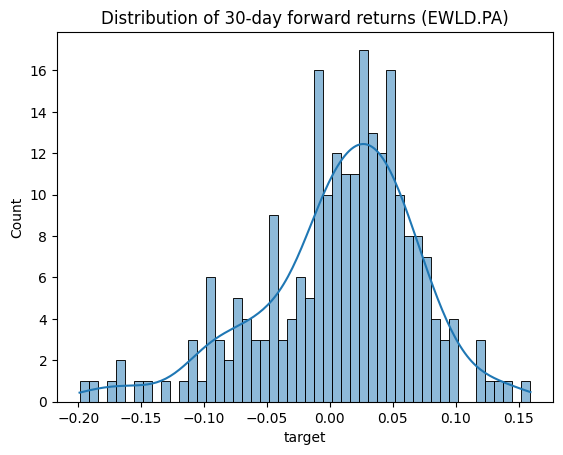

In [8]:

# ✅ Visualisation de la target
sns.histplot(df_clean['target'], bins=50, kde=True)
plt.title(f"Distribution of {WINDOW_FWD}-day forward returns ({TICKER})")
plt.show()


In [9]:

# ✅ Sauvegarde
df_clean.to_parquet(PROCESSED_DIR / f"{TICKER.replace('.','_')}_features.parquet", index=False)
print(f"[✅] Features saved to {PROCESSED_DIR / f'{TICKER.replace('.', '_')}_features.parquet'}")


[✅] Features saved to ..\data\processed\EWLD_PA_features.parquet
